## **1. Initial Setup**
Import packages and download the datasets

[한국어] 코드 수행 방법은 다음과 같습니다
1. 각 블록당 차례로 "Shift + Enter"를 눌러 실행해 주세요. (처음 시작 시 경고창이 뜬다면, 무시하고 계속하기를 눌러 주세요.)
2. 수행된 결과물을 아래 창에서 확인해 주세요.
3. 5분 이상씩 걸리는 블록들도 있습니다. 조금만 기다려 주세요.

[English] How to run code in Google Colaboratory
1. Press "Shift + Enter" to each blocks in order. (If a warning message pops up at first, just ignore and continue.)
2. See the result below each blocks.
3. Some blocks take more than 5 min to finish the code. Please kindly wait.

In [ ]:
# uncomment below if you use GPU
# !nvidia-smi

Thu Jun 25 05:06:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import packages

import os
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from bisect import bisect_left
import seaborn as sns
from sklearn import model_selection
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.feature_selection import RFE

In [ ]:
# get raw files from the url
# original dataset link: https://archive.ics.uci.edu/ml/datasets/Bar+Crawl%3A+Detecting+Heavy+Drinking

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00515/data.zip


--2020-06-25 12:34:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00515/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160343356 (153M) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>] 152.92M  43.2MB/s    in 4.0s    

2020-06-25 12:34:56 (38.3 MB/s) - ‘data.zip’ saved [160343356/160343356]



In [ ]:
# unzip the datasets

!unzip data.zip

Archive:  data.zip
  inflating: all_accelerometer_data_pids_13.csv  
   creating: clean_tac/
  inflating: clean_tac/DK3500_clean_TAC.csv  
  inflating: clean_tac/JR8022_clean_TAC.csv  
  inflating: clean_tac/SA0297_clean_TAC.csv  
  inflating: clean_tac/BU4707_clean_TAC.csv  
  inflating: clean_tac/HV0618_clean_TAC.csv  
  inflating: clean_tac/SF3079_clean_TAC.csv  
  inflating: clean_tac/MJ8002_clean_TAC.csv  
  inflating: clean_tac/CC6740_clean_TAC.csv  
  inflating: clean_tac/PC6771_clean_TAC.csv  
  inflating: clean_tac/MC7070_clean_TAC.csv  
  inflating: clean_tac/DC6359_clean_TAC.csv  
  inflating: clean_tac/BK7610_clean_TAC.csv  
  inflating: clean_tac/JB3156_clean_TAC.csv  
  inflating: phone_types.csv         
  inflating: pids.txt                
   creating: raw_tac/
  inflating: raw_tac/JR8022 CAM results.xlsx  
  inflating: raw_tac/DK3500 CAM Results.xlsx  
  inflating: raw_tac/MC7070 CAM Results.xlsx  
  inflating: raw_tac/DC6359 CAM Results.xlsx  
  inflating: raw_tac/HV

In [ ]:
# view the heads to check if the data was successfully unzipped

!head all_accelerometer_data_pids_13.csv

time,pid,x,y,z
0,JB3156,0.0,0.0,0.0
0,CC6740,0.0,0.0,0.0
1493733882409,SA0297,0.0758,0.0273,-0.0102
1493733882455,SA0297,-0.0359,0.0794,0.0037
1493733882500,SA0297,-0.2427,-0.0861,-0.0163
1493733883945,SA0297,-0.2888,0.0514,-0.0145
1493733883953,SA0297,-0.0413,-0.0184,-0.0105
1493733883957,SA0297,-0.0413,-0.0001,0.0017
1493733883963,SA0297,-0.0286,-0.0028,-0.0094


In [ ]:
# view the tails to check if the data was successfully unzipped

!tail all_accelerometer_data_pids_13.csv

1493829248070,CC6740,-0.17974496,0.23199654,0.24817896
1493829248095,CC6740,-0.12626481,0.2121849,0.24753189
1493829248120,CC6740,-0.074805975,0.22587729,0.13682842
1493829248145,CC6740,-0.06129789400000001,0.23894882,0.21852207
1493829248169,CC6740,-0.059723377,0.06523037,0.048253536
1493829248196,CC6740,-0.13395596,0.124726295,-0.010735989
1493829248220,CC6740,-0.100764275,0.18087196,0.046448708
1493829248245,CC6740,-0.13185287,0.19593382,0.18108797
1493829248270,CC6740,-0.14970446,0.19448185,0.20239258
1493829248294,CC6740,-0.107287645,0.15354776,0.16859484


## **2. Data Loading**
Read and Load data from csv files

In [ ]:
# read the datasets as pandas dataframes. Since the data was collected by different phone types, we will focus on 'BK7610'.

acc_data = pd.read_csv("all_accelerometer_data_pids_13.csv")    # Accelerometer Data
ptypes = pd.read_csv("phone_types.csv")                         # phone types
tac_data = pd.read_csv("clean_tac/BK7610_clean_TAC.csv")        # TAC Data (TAC Data of pid BK7610)

In [ ]:
# check the accelerometer Data

acc_data.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [ ]:
# check pid Data

ptypes.head()

,pid,phonetype
0,BK7610,iPhone
1,BU4707,iPhone
2,CC6740,Android
3,DC6359,iPhone
4,DK3500,iPhone


In [ ]:
# check TAC Data of BK7610

tac_data.head()

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145


In [ ]:
# take the BK7610's accelerometer data

temp = acc_data[acc_data['pid'] == "BK7610"]
directory = "processed"
try:
  if not os.path.exists(directory):
    os.makedirs(directory)
except OSError:
  print ("Error: Creating directory. " + directory)

directory = directory + "/BK7610_acc.csv"
temp.to_csv(directory, index = False)

# In case you try to divide the whole accelerometer data into each pids
# for pid in ptypes['pid']:
#   temp = acc_data[acc_data['pid'] == pid]
#   location = "processed/" + pid + "_acc.csv"
#   temp.to_csv(location, index = False)

In [ ]:
# check the BK7610's accelerometer data

acc_bk = pd.read_csv("processed/BK7610_acc.csv")
acc_bk.head()

,time,pid,x,y,z
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447
3,1493735870729,BK7610,0.1255,-0.0038,0.0111
4,1493735870753,BK7610,0.1076,0.0032,0.0276


In [ ]:
# time is recorded as unix timestamp milliseconds(accelerometer) and seconds(tac). Check out if it was recorded properly

def shifttime_sec(x):
  result = datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')
  return result

def shifttime_millisec(x):
  result = datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d %H:%M:%S')
  return result

converted_timestamps = shifttime_sec(tac_data['timestamp'].iloc[0])
print(converted_timestamps)
converted_timestamps = shifttime_millisec(acc_bk['time'].iloc[0])
print(converted_timestamps)

2017-05-02 09:51:54
2017-05-02 14:37:50


## **3. Preprocessing**
Check out the characteristics of data and preprocess

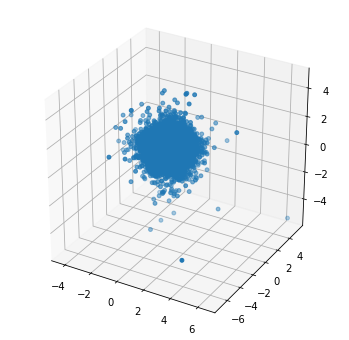

In [ ]:
# draw the 3D graph of accelerometer data

x = acc_bk['x'].to_numpy()
y = acc_bk['y'].to_numpy()
z = acc_bk['z'].to_numpy()

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', s=15)

In [ ]:
# label the accelerometer data based on the time gap of TAC

acc_timeindex = acc_bk
acc_timeindex.index = acc_bk['time']
tac_timeindex = tac_data
tac_timeindex.index = tac_data['timestamp']

accTimestamps = np.array(acc_bk.index)
tacTimestamps = np.array(tac_data.index)

def labeling(accTime):
  lowerIndex = bisect_left(tacTimestamps, accTime / 1000, hi=len(tacTimestamps)-1) #find the upper index of the closest time stamp
  closest = tac_data.index.get_loc(min(tacTimestamps[lowerIndex], accTimestamps[lowerIndex+1],key=lambda x: abs(x - accTime / 1000))) #find the closest between upper and lower timestam
  if tac_data.iloc[closest]['TAC_Reading'] > 0.08:
    return True;
  else:
    return False;
  
# check if the function work well
labeling(1493735870653)

False

In [ ]:
# label the accelerometer values. (It would take some time)

acc_timeindex['label'] = acc_timeindex['time'].apply(labeling)

In [ ]:
# check the labeled result
acc_timeindex

,time,pid,x,y,z,label
time,,,,,,
1493735870653,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False
1493735870679,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False
1493735870703,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False
1493735870729,1493735870729,BK7610,0.1255,-0.0038,0.0111,False
1493735870753,1493735870753,BK7610,0.1076,0.0032,0.0276,False
...,...,...,...,...,...,...
1493767770540,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True
1493767770564,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True
1493767770590,1493767770590,BK7610,0.0160,-0.0853,0.0906,True


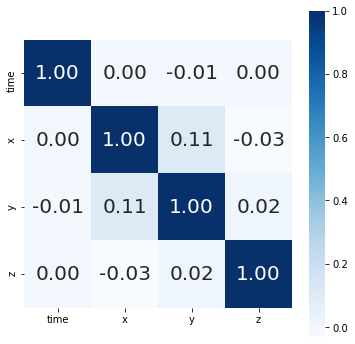

In [ ]:
# acc data: calculate the pearson correlation coefficients

acc_temp = acc_timeindex.drop(['label'], axis = 1)
corr = acc_temp.corr(method = 'pearson')
acc_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

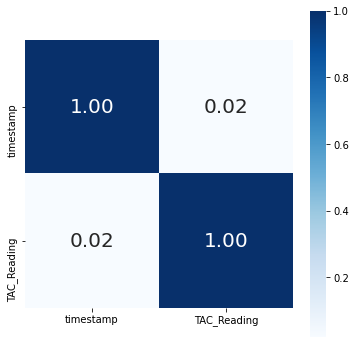

In [ ]:
# TAC data: calculate the pearson correlation coefficients

corr = tac_data.corr(method = 'pearson')
tac_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

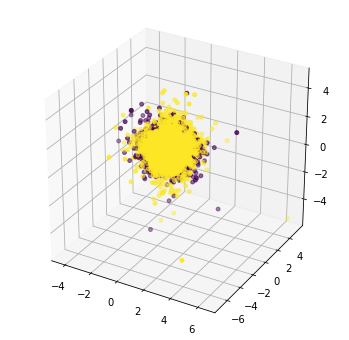

In [ ]:
# draw 3D graph using labeled results
x = acc_timeindex['x'].to_numpy()
y = acc_timeindex['y'].to_numpy()
z = acc_timeindex['z'].to_numpy()

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = acc_timeindex['label'], marker='o', s=15, label = acc_timeindex['label'])

## **4. model training (preliminary)**
Training the model and calculate the accuracy

In [ ]:
# prepare data for svm 1
acc_svm = acc_timeindex
acc_svm.reset_index(drop = True, inplace = True)
acc_svm = acc_svm.drop(['pid'], axis = 1)
acc_svm.head()

,time,x,y,z,label
0,1493735870653,0.1261,-0.0078,-0.0243,False
1,1493735870679,0.1336,-0.0697,-0.0446,False
2,1493735870703,0.1443,-0.0474,-0.0447,False
3,1493735870729,0.1255,-0.0038,0.0111,False
4,1493735870753,0.1076,0.0032,0.0276,False


In [ ]:
len(acc_svm)

1225727

In [ ]:
# randomly pick the data since the amount of data is huge

def randpick(data, sample_pct):
    np.random.seed(123)
    N = len(data)
    sample_n = int(len(data)*sample_pct) # integer
    sample = data.take(np.random.permutation(N)[:sample_n])
    return sample
  
acc_pick = acc_svm.apply(randpick, sample_pct = 0.1)
len(acc_pick)

122572

In [ ]:
# prepare data for svm 2

bklist = acc_pick.columns.tolist()
bklist.remove('label')
X = acc_pick.loc[:, bklist].values
Y = acc_pick.loc[:, ['label']].values.ravel()
print(X)
print(Y)
print(Y.dtype)

[[ 1.49376557e+12 -7.51000000e-02 -1.57100000e-01 -6.67000000e-02]
 [ 1.49375456e+12  1.88000000e-02  6.30000000e-02  1.30700000e-01]
 [ 1.49375636e+12  1.50000000e-02 -4.34000000e-02 -5.76000000e-02]
 ...
 [ 1.49376507e+12 -1.26000000e-02 -1.20000000e-02  2.10000000e-03]
 [ 1.49376123e+12  5.60000000e-02 -1.02400000e-01  2.36600000e-01]
 [ 1.49375988e+12  3.00000000e-04  3.00000000e-04  3.80000000e-03]]
[ True False  True ...  True  True  True]
bool


In [ ]:
# train model (It would take some time)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 1)
model = svm.SVC(kernel='linear', C=1.0, random_state=0).fit(X_train, y_train)

In [ ]:
# check the accuracy before evaluating the model

y_pred = model.predict(X_test)
print('Accuracy: %.5f' % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.63325


In [ ]:
# model evaluation

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00     13486
        True       0.63      1.00      0.78     23286

    accuracy                           0.63     36772
   macro avg       0.32      0.50      0.39     36772
weighted avg       0.40      0.63      0.49     36772



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **5. Feature Engineering**
Proceed feature engineering ideas

In [ ]:
# The average of raw data (accelerometer signals)
acc_timeindex

,time,pid,x,y,z,label
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False
...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,True
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,True


In [ ]:
acc_svm_fin = acc_timeindex
acc_svm_fin.reset_index(drop = True, inplace = True)
acc_svm_fin['average'] = (acc_svm_fin['x'] + acc_svm_fin['y'] + acc_svm_fin['z']) / 3
acc_svm_fin

,time,pid,x,y,z,label,average
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False,0.031333
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False,0.006433
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False,0.017400
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False,0.044267
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False,0.046133
...,...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True,0.025800
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True,0.014100
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,True,0.007100
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,True,0.009867


In [ ]:
# Number of Recorded Time (how many steps did the walker stepped in 30 mins?) - This would take some time
t_this = 1493735870653
t_next = 0
index_start = 0
index_last = 0
count = 0
recordList = []

for i in range (1, len(acc_svm_fin)):
  t_next = acc_svm_fin.iloc[i]['time']
  index_last = i

  if (t_next - t_this) > 1800000:
    for j in range (index_start, index_last):
      recordList.append(count)
    t_this = t_next
    index_start = index_last
    print("Successfully Recorded! The value is " + str(count))
    count = 0
  else:
    count = count + 1

Successfully Recorded! The value is 66457
Successfully Recorded! The value is 71812
Successfully Recorded! The value is 71810
Successfully Recorded! The value is 71821
Successfully Recorded! The value is 68810
Successfully Recorded! The value is 71810
Successfully Recorded! The value is 38865
Successfully Recorded! The value is 71817
Successfully Recorded! The value is 71814
Successfully Recorded! The value is 71813
Successfully Recorded! The value is 70812
Successfully Recorded! The value is 71138
Successfully Recorded! The value is 71806
Successfully Recorded! The value is 69819
Successfully Recorded! The value is 69815
Successfully Recorded! The value is 71820
Successfully Recorded! The value is 71813


In [ ]:
# put the records to the dataframe

recordS = pd.Series(recordList)
acc_svm_fin['recordedT'] = recordS
acc_svm_fin.head()

,time,pid,x,y,z,label,average,recordedT
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False,0.031333,66457.0
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False,0.006433,66457.0
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False,0.017400,66457.0
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False,0.044267,66457.0
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False,0.046133,66457.0


In [ ]:
acc_svm_row = acc_svm_fin.fillna(51875).iloc[0:1225727, 0:8]
acc_svm_fin['recordedT'] = acc_svm_row['recordedT']
acc_svm_fin

,time,pid,x,y,z,label,average,recordedT
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False,0.031333,66457.0
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False,0.006433,66457.0
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False,0.017400,66457.0
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False,0.044267,66457.0
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False,0.046133,66457.0
...,...,...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True,0.025800,51875.0
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True,0.014100,51875.0
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,True,0.007100,51875.0
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,True,0.009867,51875.0


In [ ]:
# Rate of Change (How fast the walker changes its fastness?) - This would take some time

def rateChange(x, y, z):
  # this calculates the total length of the acceleration
  result = x**2 + y**2 + z**2
  result = math.sqrt(result)
  return result

acc_svm_fin['rate'] = acc_svm_fin.apply(lambda x: rateChange(x['x'], x['y'], x['z']), axis=1)
acc_svm_fin

,time,pid,x,y,z,label,average,recordedT,rate
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False,0.031333,66457.0,0.128657
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False,0.006433,66457.0,0.157150
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False,0.017400,66457.0,0.158327
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False,0.044267,66457.0,0.126047
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False,0.046133,66457.0,0.111129
...,...,...,...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True,0.025800,51875.0,0.189619
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True,0.014100,51875.0,0.186865
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,True,0.007100,51875.0,0.125461
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,True,0.009867,51875.0,0.119429


In [ ]:
# Max accelerometer value (How fast and large the walker changes its direction?)

def maximum(x, y, z):
  templist = []
  templist.append(x)
  templist.append(y)
  templist.append(z)
  return max(templist)

acc_svm_fin['max'] = acc_svm_fin.apply(lambda x: maximum(x['x'], x['y'], x['z']), axis=1)
acc_svm_fin

,time,pid,x,y,z,label,average,recordedT,rate,max
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False,0.031333,66457.0,0.128657,0.1261
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False,0.006433,66457.0,0.157150,0.1336
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False,0.017400,66457.0,0.158327,0.1443
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False,0.044267,66457.0,0.126047,0.1255
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False,0.046133,66457.0,0.111129,0.1076
...,...,...,...,...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True,0.025800,51875.0,0.189619,0.1719
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True,0.014100,51875.0,0.186865,0.1634
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,True,0.007100,51875.0,0.125461,0.0906
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,True,0.009867,51875.0,0.119429,0.0901


## **6. Based on the Feature Engineering - Approach**
Training the model and calculate the accuracy

In [ ]:
# Prepare the values like what we did in the preliminary approach.
def randpick_fin(data, sample_pct):
    np.random.seed(10)
    N = len(data)
    sample_n = int(len(data)*sample_pct) # integer
    sample = data.take(np.random.permutation(N)[:sample_n])
    return sample

acc_svm_finAp = acc_svm_fin.drop(['pid'], axis = 1)
acc_pick_fin = acc_svm_finAp.apply(randpick, sample_pct = 0.1)
bklist_fin = acc_pick_fin.columns.tolist()
bklist_fin.remove('label')
X_fin = acc_pick_fin.loc[:, bklist_fin].values
Y_fin = acc_pick_fin.loc[:, ['label']].values.ravel()
print(X_fin)
print(Y_fin)
print(Y_fin.dtype)

[[ 1.49376557e+12 -7.51000000e-02 -1.57100000e-01 ...  7.18130000e+04
   1.86465305e-01 -6.67000000e-02]
 [ 1.49375456e+12  1.88000000e-02  6.30000000e-02 ...  7.08120000e+04
   1.46304238e-01  1.30700000e-01]
 [ 1.49375636e+12  1.50000000e-02 -4.34000000e-02 ...  7.11380000e+04
   7.36635595e-02  1.50000000e-02]
 ...
 [ 1.49376507e+12 -1.26000000e-02 -1.20000000e-02 ...  7.18130000e+04
   1.75262660e-02  2.10000000e-03]
 [ 1.49376123e+12  5.60000000e-02 -1.02400000e-01 ...  6.98150000e+04
   2.63820621e-01  2.36600000e-01]
 [ 1.49375988e+12  3.00000000e-04  3.00000000e-04 ...  6.98190000e+04
   3.82361086e-03  3.80000000e-03]]
[ True False  True ...  True  True  True]
bool


In [ ]:
# train model

X_fin_train, X_fin_test, y_fin_train, y_fin_test = model_selection.train_test_split(X_fin, Y_fin, test_size = 0.3, random_state = 1)
model_fin = svm.SVC(kernel='linear', C=1.0, random_state=0).fit(X_fin_train, y_fin_train)
# model = svm.SVC(kernel="poly", degree=3, coef0=1, C=5).fit(X_train, y_train)

In [ ]:
# check the accuracy before evaluating the model

y_fin_pred = model_fin.predict(X_fin_test)
print('Accuracy: %.5f' % metrics.accuracy_score(y_fin_test, y_fin_pred))

Accuracy: 0.63325


In [ ]:
# model evaluation

print(metrics.classification_report(y_fin_test, y_fin_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00     13486
        True       0.63      1.00      0.78     23286

    accuracy                           0.63     36772
   macro avg       0.32      0.50      0.39     36772
weighted avg       0.40      0.63      0.49     36772



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **7. Feature Selection**
Selecting the features to figure out the useful features

In [ ]:
acc_svm_fin

,time,pid,x,y,z,label,average,recordedT,rate,max
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243,False,0.031333,66457.0,0.128657,0.1261
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446,False,0.006433,66457.0,0.157150,0.1336
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447,False,0.017400,66457.0,0.158327,0.1443
3,1493735870729,BK7610,0.1255,-0.0038,0.0111,False,0.044267,66457.0,0.126047,0.1255
4,1493735870753,BK7610,0.1076,0.0032,0.0276,False,0.046133,66457.0,0.111129,0.1076
...,...,...,...,...,...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719,True,0.025800,51875.0,0.189619,0.1719
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634,True,0.014100,51875.0,0.186865,0.1634
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906,True,0.007100,51875.0,0.125461,0.0906
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162,True,0.009867,51875.0,0.119429,0.0901


In [ ]:
# Feature extraction - this would take some time
model_ex = svm.SVC(kernel='linear', C=1.0, random_state=0)
fe = RFE(model_ex, 4)
model_fe = fe.fit(X_fin_train, y_fin_train)

In [ ]:
print("Number of Features: %d" % model_fe.n_features_)
print("Selected Features: %s" % model_fe.support_)
print("Feature Ranking: %s" % model_fe.ranking_)

Number of Features: 4
Selected Features: [ True False False False False  True  True  True]
Feature Ranking: [1 3 4 2 5 1 1 1]


## **8. Final Approach**
Final Approach to train the model and figure out the accuracy

In [ ]:
acc_svm_f = acc_svm_fin.drop(['pid', 'x', 'y', 'z', 'average'], axis = 1)
acc_pick_f = acc_svm_f.apply(randpick, sample_pct = 0.15)
bklist_f = acc_pick_f.columns.tolist()
bklist_f.remove('label')
X_f = acc_pick_f.loc[:, bklist_f].values
Y_f = acc_pick_f.loc[:, ['label']].values.ravel()

X_f_train, X_f_test, y_f_train, y_f_test = model_selection.train_test_split(X_f, Y_f, test_size = 0.3, random_state = 1)
model_f = svm.SVC(kernel='linear', C=1.0, random_state=0).fit(X_f_train, y_f_train)

# check the accuracy before evaluating the model

y_f_pred = model_f.predict(X_f_test)
print('Accuracy: %.5f' % metrics.accuracy_score(y_f_test, y_f_pred))

Accuracy: 0.63345


In [ ]:
# model evaluation

print(metrics.classification_report(y_f_test, y_f_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00     20218
        True       0.63      1.00      0.78     34940

    accuracy                           0.63     55158
   macro avg       0.32      0.50      0.39     55158
weighted avg       0.40      0.63      0.49     55158



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
